In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VOLUME = 1 # MPC **3

In [3]:
filename= "volume_and_excentricity/VolumeAndEcentricity_SDSS_data_Planck15_.vae"
data = np.genfromtxt(filename, delimiter=', ')[:,:-1]

fig_path = "figures/"


ID = data[:,0]

N = ID.shape[0]


N_part = data[:,1]
V = data[:,2]
r = data[:,3]

a = data[:,4]
b = data[:,5]
c = data[:,6]

Few plots to check how the analysis was performed.

In [4]:
!mkdir figures

mkdir: cannot create directory ‘figures’: File exists


In [5]:
if (True):

    fig = plt.figure()
    plt.scatter(ID,N_part)
    plt.xlabel("Void ID")
    plt.ylabel("Number of Particles")
    plt.savefig(fig_path + "Planck15 Number of Particles per Void.pdf")
    plt.close()
    
    fig = plt.figure()
    plt.scatter(ID, r)
    plt.xlabel("Void ID")
    plt.ylabel("Radius (Mpc)")
    plt.savefig(fig_path + "Planck15 Radius per Void.pdf")
    plt.close()
    
    fig = plt.figure()
    plt.scatter(N_part,r)
    plt.xlabel("Number of Particles")
    plt.ylabel("Radius (Mpc)")
    plt.savefig(fig_path + "Planck15 Radius vs Particle Number.pdf")
    plt.close()    

In [6]:
oc_filename = "observed_catalogs/SDSS_data_Planck15.txt"
OC = np.loadtxt(oc_filename)

filename2 = "masterlists/VoidMasterList_SDSS_data_Planck15.vml"
particles = np.loadtxt(filename2, delimiter=" ")

Plot each void and the whole catalog. Takes a long time with the .PDF output format. It os faster with .PNG format.

In [ ]:
if (False):
    for i in ID:
        n = int(i)
        print(n)

        fig_name= "void_{}_.png".format(n)
        index = np.where(particles[:,0] == n )

        fig = plt.figure(figsize=(10,10))
        plt.scatter(OC[:,0], OC[:,1], s= 0.01)
        plt.scatter(particles[index,1], particles[index,2], s=4.0)

        plt.savefig( fig_path + fig_name)
        plt.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
83
85
86
87
88
89
90
91
92
93
94
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
277
278
279
281
282
283
284
28

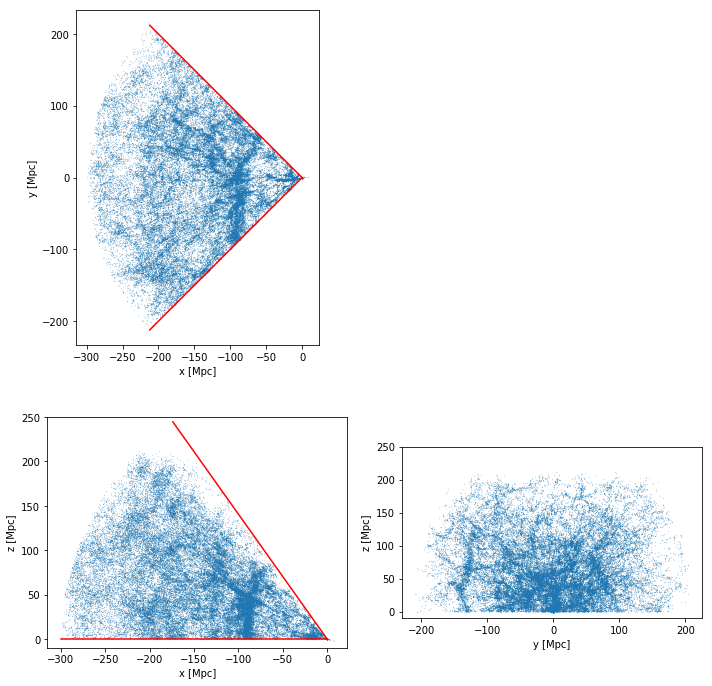

In [7]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221, adjustable='box', aspect=1)

ax1.scatter(OC[:,0], OC[:,1], s= 0.01)
ax1.set_xlabel("x [Mpc]")
ax1.set_ylabel("y [Mpc]")


ax2=fig.add_subplot(223, adjustable='box', aspect=1)
ax2.scatter(OC[:,0], OC[:,2], s= 0.01)
ax2.set_xlabel("x [Mpc]")
ax2.set_ylabel("z [Mpc]")
ax2.set_ylim(-10,250)

ax3=fig.add_subplot(224, adjustable='box', aspect=1)
ax3.scatter(OC[:,1], OC[:,2], s= 0.01)
ax3.set_xlabel("y [Mpc]")
ax3.set_ylabel("z [Mpc]")
ax3.set_ylim(-10,250)

radius = np.linspace(0,300)

phi1 = (180 - 45)*np.pi/180
x_lim = radius * np.cos(phi1)
y_lim = radius * np.sin(phi1)
ax1.plot(x_lim, y_lim, c="r")

phi2 = (180 + 45)*np.pi/180
x_lim = radius * np.cos(phi2)
y_lim = radius * np.sin(phi2)
ax1.plot(x_lim, y_lim, c="r")


theta1 = (180 - 54.6)*np.pi/180
x_lim = radius * np.cos(theta1)
y_lim = radius * np.sin(theta1)
ax2.plot(x_lim, y_lim, c="r")

theta2 = (180 - 0)*np.pi/180
x_lim = radius * np.cos(theta2)
y_lim = radius * np.sin(theta2)
ax2.plot(x_lim, y_lim, c="r")


plt.tight_layout()

fig_name = "Planck15_catalog.pdf"
plt.savefig(fig_path + fig_name)

fig_name = "Planck15_catalog.png"
plt.savefig(fig_path + fig_name)




In [8]:
print(OC[:,0].min(), OC[:,0].max())

-299.19354553528206 7.610726700992383


In [9]:
print(OC[:,1].min(), OC[:,1].max())

-208.83607317508756 204.58669113006167


In [10]:
print(OC[:,2].min(), OC[:,2].max())

-1.796155646130186 211.52213058257158


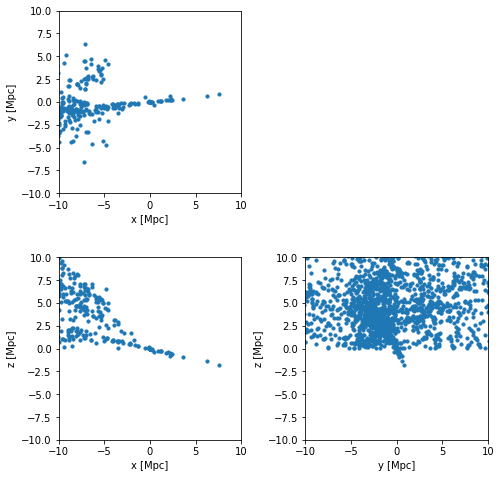

In [11]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221, adjustable='box', aspect=1)

ax1.scatter(OC[:,0], OC[:,1], s= 10)
ax1.set_xlabel("x [Mpc]")
ax1.set_ylabel("y [Mpc]")
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)


ax2=fig.add_subplot(223, adjustable='box', aspect=1)
ax2.scatter(OC[:,0], OC[:,2], s= 10)

ax2.set_xlabel("x [Mpc]")
ax2.set_ylabel("z [Mpc]")
ax2.set_xlim(-10,10)
ax2.set_ylim(-10,10)


ax3=fig.add_subplot(224, adjustable='box', aspect=1)
ax3.scatter(OC[:,1], OC[:,2], s= 10)
ax3.set_xlabel("y [Mpc]")
ax3.set_ylabel("z [Mpc]")
ax3.set_xlim(-10,10)
ax3.set_ylim(-10,10)



fig_name = "Planck15_catalog_detail.png"
plt.savefig(fig_path + fig_name)


plt.tight_layout()

In [12]:
RC_filename = "random_catalogs/SDSS_data_random_Planck15.txt"
RC = np.loadtxt(RC_filename)

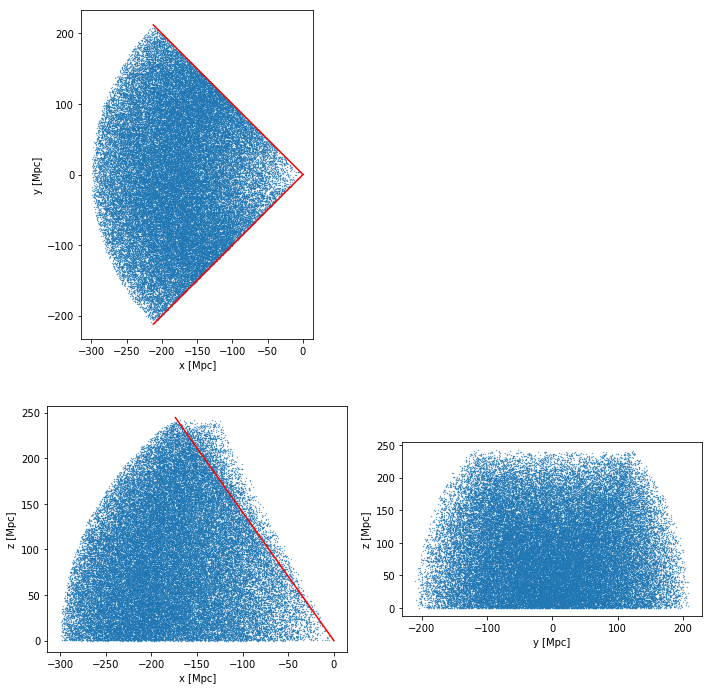

In [13]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221, adjustable='box', aspect=1)

ax1.scatter(RC[:,0], RC[:,1], s= 0.1)

radius = np.linspace(0,300)

phi1 = (180 - 45)*np.pi/180
x_lim = radius * np.cos(phi1)
y_lim = radius * np.sin(phi1)
ax1.plot(x_lim, y_lim, c="r")

phi2 = (180 + 45)*np.pi/180
x_lim = radius * np.cos(phi2)
y_lim = radius * np.sin(phi2)
ax1.plot(x_lim, y_lim, c="r")

ax1.set_xlabel("x [Mpc]")
ax1.set_ylabel("y [Mpc]")


ax2=fig.add_subplot(223, adjustable='box', aspect=1)
ax2.scatter(RC[:,0], RC[:,2], s= 0.1)

theta1 = (180 - 54.6)*np.pi/180
x_lim = radius * np.cos(theta1)
y_lim = radius * np.sin(theta1)
ax2.plot(x_lim, y_lim, c="r")

ax2.set_xlabel("x [Mpc]")
ax2.set_ylabel("z [Mpc]")

ax3=fig.add_subplot(224, adjustable='box', aspect=1)
ax3.scatter(RC[:,1], RC[:,2], s= 0.1)
ax3.set_xlabel("y [Mpc]")
ax3.set_ylabel("z [Mpc]")

#fig_name = "Planck15_catalog.png"
#plt.savefig(fig_path + fig_name)


plt.tight_layout()

In [14]:
print("X:", RC[:,0].min()/300, RC[:,0].max()/300)
print("Y:", RC[:,1].min()/300, RC[:,1].max()/300)
print("Z:", RC[:,2].min()/300, RC[:,2].max()/300)

X: -0.9977754312033734 -0.01640382144089259
Y: -0.6989869597717112 0.6942697015636188
Z: 2.507208586879812e-06 0.8063339285053279


In [15]:
R = (RC[:,0]**2 + RC[:,1]**2 )**0.5
index = np.where(R>1)[0]

theta1 = np.arcsin(max(RC[index,1]/R[index]))*180/np.pi
print(theta1)

theta2 = np.arcsin(min(RC[index,1]/R[index]))*180/np.pi
print(theta2)

44.999375847807066
-44.99997210004986


In [16]:
R = (RC[:,0]**2 + RC[:,2]**2 )**0.5
index = np.where(R>1)[0]

phi1 = np.arcsin(max(RC[index,2]/R[index]))*180/np.pi
print( phi1)

62.45883114910767


In [17]:
0.69*180/np.pi

39.5340878640268

In [18]:
# StackOverflow volume of sphere
# https://stackoverflow.com/questions/13188948/how-to-use-scipy-integrate-to-get-the-volume-of-a-truncated-sphere

import scipy
from scipy.integrate import quad, dblquad, tplquad
from numpy import *
# limits for radius
r1 = 0.
r2 = 300.
# limits for theta
t1 = -45 * np.pi/180  # 0
t2 = +45 * np.pi/180  # 2*pi
# limits for phi
p1 = (90 - 54.67307753992028)*np.pi/180  # 0
p2 = np.pi / 2                 # pi

def diff_volume(p,t,r):
    return r**2*sin(p)

VOLUME = tplquad(diff_volume, r1, r2, lambda r:   t1, lambda r:   t2,
                                      lambda r,t: p1, lambda r,t: p2)[0]

In [19]:
VOLUME # In Mpc**3

11534033.462357387

' \n\nstart = 0\nstop  = 1\nnumb  = 21\n\ndeltax = (stop - start) / (numb -1)\n\nBINS = np.linspace(start,stop, numb, endpoint=True)\nx_bins = []\nfor i in range(numb -1):\n    x_bins.append( (BINS[i+1] + BINS[i])/2)\n\nx_bins = np.array(x_bins)\n\ncounts, bins = np.histogram(x, bins=BINS)\n\n\n\nfig = plt.figure()\nplt.plot(x_bins, counts/(N*deltax * VOLUME))\nplt.yscale("log")\nplt.ylim(1e-9, 1e-6)\nprint(counts/(N*deltax * VOLUME))\n'

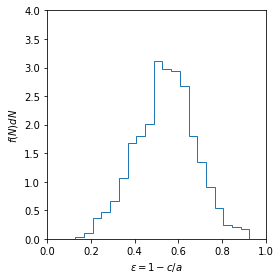

In [20]:
x = 1-c/a

fig = plt.figure(figsize=(4,4))
plt.hist(x, bins=20, density=True, histtype="step")
plt.ylabel(r"$f(N)dN$")
plt.xlabel(r"$\epsilon = 1 - c/a$")
plt.xlim(0,1)
plt.ylim(0,4)
plt.tight_layout()
plt.savefig("void_ellipticity.pdf")


""" 

start = 0
stop  = 1
numb  = 21

deltax = (stop - start) / (numb -1)

BINS = np.linspace(start,stop, numb, endpoint=True)
x_bins = []
for i in range(numb -1):
    x_bins.append( (BINS[i+1] + BINS[i])/2)

x_bins = np.array(x_bins)

counts, bins = np.histogram(x, bins=BINS)



fig = plt.figure()
plt.plot(x_bins, counts/(N*deltax * VOLUME))
plt.yscale("log")
plt.ylim(1e-9, 1e-6)
print(counts/(N*deltax * VOLUME))
"""

In [21]:
import scipy.stats

def density_estimation(m1, m2):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

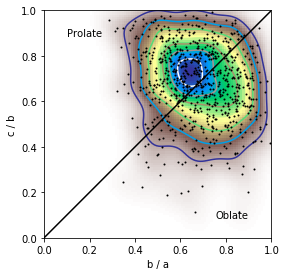

In [22]:
m1, m2 = b/a, c/b

xmin = 0
xmax = 1
ymin = 0
ymax = 1

X, Y, Z = density_estimation(m1, m2)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)            

# Show density 
ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])

# Add contour lines
plt.contour(X, Y, Z, cmap="terrain")                                                                           

ax.plot(m1, m2, 'k.', markersize=2)    

ax.set_xlim([xmin, xmax])                                                                           
ax.set_ylim([ymin, ymax])                                                                           


unitary = np.linspace(0,1)
ax.plot(unitary, unitary, c="k")

ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

plt.xlabel("b / a")
plt.ylabel("c / b")
plt.tight_layout()
plt.savefig("void_two_axis_ratios.pdf")

plt.show()

In [23]:
VOLUME

11534033.462357387

### Extract from Ronconi et al. 2019

>Fig. 2 compares the measured and modeled void size
>functions, defined as the comoving number density of voids
>in logarithmic bins of effective radii, divided by the logarith-
>mic extent of the bins

Data from simulations, so, comoving distance is in $h^{-1}$Mpc units.

In [25]:
ron_64  = np.loadtxt("data/ronconi_2019_z0_b64.dat" , delimiter="\t")
ron_128 = np.loadtxt("data/ronconi_2019_z0_b128.dat", delimiter="\t")
ron_256 = np.loadtxt("data/ronconi_2019_z0_b256.dat", delimiter="\t")
ron_500 = np.loadtxt("data/ronconi_2019_z0_b500.dat", delimiter="\t")

In [26]:
ade_PDF = np.loadtxt("data/adermann_2018_PDF.dat")

[Quick guide to h dependence in cosmology](http://www.astro.ljmu.ac.uk/~ikb/research/h-units.html)

|                        | Value, assuming $h=0.7$ | Value with $h$ dependence |
|------------------------|-------------------------|---------------------------|
| Line-of-sight distance | 1.00 Mpc                | 0.70 $h^{-1}$ Mpc         |
| Volume                 | 1.00 Mpc$^3$            | 0.343 $h^{-3}$ Mpc$^{-3}$ |

[Damn You, Little h! (Or, Real-World Applications of the Hubble Constant Using Observed and Simulated Data)](http://adsabs.harvard.edu/abs/2013PASA...30...52C) Publlications of the Astronomical Society of Australia

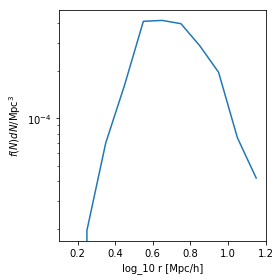

In [27]:
h = 0.6774
V_h = VOLUME * (h**3)

Bins = np.linspace(0.1,1.2, 12)
deltaBins = Bins[1]-Bins[0]
deltaBins

y, Bins = np.histogram( np.log10(r*h), bins=Bins, density=False )

x = (Bins[:-1] + Bins[1:])/2

fig = plt.figure(figsize=(4,4))

plt.plot(x, y/( deltaBins * V_h))
#plt.xscale("log")
plt.yscale("log")
#plt.ylim(4e-11, 4e-8)


plt.ylabel(r"$ f(N) dN  / \mathrm{Mpc}^3$")
plt.xlabel("log_10 r [Mpc/h]")
plt.tight_layout()
plt.savefig("void_size_density_function.pdf")

#print(x,y)

Text(0,0.5,'$ dn / d \\ln r (\\mathrm{ [h/Mpc]}^3)$')

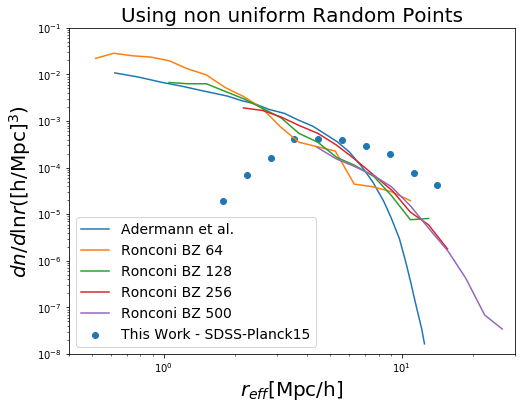

In [28]:
fig = plt.figure(figsize=[8,6])

fs = 20

plt.title("Using non uniform Random Points", fontsize=fs)
plt.plot(( ade_PDF[:,0] * ( 3 / (4 * pi)) ) ** (1 / 3.0), ade_PDF[:,1] , label="Adermann et al.")
plt.xscale("log")
plt.yscale("log")


plt.plot( ron_64[:,0], ron_64[:,1],   label="Ronconi BZ 64")
plt.plot(ron_128[:,0], ron_128[:,1], label="Ronconi BZ 128")
plt.plot(ron_256[:,0], ron_256[:,1], label="Ronconi BZ 256")
plt.plot(ron_500[:,0], ron_500[:,1], label="Ronconi BZ 500")




plt.scatter(10**x, y/( deltaBins * V_h), label="This Work - SDSS-Planck15")


plt.legend(loc=3, fontsize=int(fs*0.7))

plt.ylim(0.00000001,0.1)
plt.xlim(0.4,30)
plt.xlabel(r"$r_{eff} \mathrm{ [Mpc/h]}$", fontsize=fs)
plt.ylabel(r"$ dn / d \ln r (\mathrm{ [h/Mpc]}^3)$", fontsize=fs)




In [29]:
V_h / 64 ** 3

13.676559588163343

In [30]:
V_h / 500 ** 3

0.02868182429343593

In [31]:
print( "Bin middle value, counts")
for i in range(x.shape[0]):
    print(x[i], y[i])

Bin middle value, counts
0.15000000000000002 0
0.25 7
0.35 25
0.45 58
0.55 147
0.6499999999999999 149
0.75 142
0.8499999999999999 103
0.95 70
1.0499999999999998 27
1.15 15


In [32]:
print(Bins)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]


In [33]:
linspace(0.1,1.2, 12)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

In [34]:
OC.shape

(56995, 3)